# Exercise 2 - part 1 - pandas basics

This notebook is adapted by Jonathan Schler and Moshe Friedman and based on pandas's "<a href="https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html">10 minutes to pandas</a>" tutorial.

Pandas is an open source, easy-to-use data structures and data analysis tools for the Python programming language.

Library documentation: <a>http://pandas.pydata.org/</a>

In this tutorial, we will cover:
- pandas object creating (series, datafames and more)
- viewing data
- selection of data
- basic plotting (via pandas)
- saving and loading data

In [25]:
# Customarily, we import as follows:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Reminder about Built-In Documentation

Don't forget that IPython gives you the ability to quickly explore the contents of a package (by using the tab-completion feature) as well as the documentation of various functions (using the ``?`` character). 

For example, to display all the contents of the pandas namespace, you can type

```ipython
In [3]: pd.<TAB>
```

And to display Pandas's built-in documentation, you can use this:

```ipython
In [4]: pd?
```

More detailed documentation, along with tutorials and other resources, can be found at http://pandas.pydata.org/.

In [ ]:
# pd.<TAB>
pd.

## Object Creation

See the [Data Structure Intro section](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro) 

### Series
What are Pandas Series? <br/>
(Answer from: https://www.geeksforgeeks.org/python-pandas-series/) <br/>
<br/>
Pandas Series is a one-dimensional labeled array capable of holding data of any type (integer, string, float, python objects, etc.). The axis labels are collectively called index. <br/>
<br/>
Pandas Series is nothing but a column in an excel sheet.

In [22]:
# Creating a Series by passing a list of values, letting pandas create a default integer index:
s = pd.Series([1,3,5,np.nan,6,8])

In [7]:
print (type(s))
print(s)
s[2]

<class 'pandas.core.series.Series'>
0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


5.0

In [6]:
print(type(s.values))
s.values

<class 'numpy.ndarray'>


array([ 1.,  3.,  5., nan,  6.,  8.])

In [7]:
print(type(s.index))
s.index

<class 'pandas.core.indexes.range.RangeIndex'>


RangeIndex(start=0, stop=6, step=1)

In [8]:
s2 = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
print(s2)
s2['b']

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64


0.5

In [12]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
print(population,'\n')
print(population['Florida'])
population['Texas':'Illinois'] # notice that here the index is inclusive 

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64 

19552860


Texas       26448193
New York    19651127
Florida     19552860
Illinois    12882135
dtype: int64

In [13]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

## Creating a DataFrame
A Data frame is a two-dimensional data structure with labeled axes (rows and columns). <br/><br/>
Pandas allows various data manipulation operations.<br/>
The DataFrame data structure is 

### Pandas and dataframe
Pandas is mainly used for machine learning in form of dataframes. <br/>
Pandas allow importing data of various file formats such as csv, excel etc.<br/> 
Pandas allows various data manipulation operations such as groupby, join, merge, melt, concatenation as well as data cleaning features such as filling, replacing or imputing null values.

In [14]:
df_states = pd.DataFrame({'population': population,
                       'area': area})
df_states
# Display the index & columns:
df_states.index
df_states.columns
df_states['area'] 

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

Index(['population', 'area'], dtype='object')

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

### indexes for dataframe and series
Index is like an address, that’s how any data point across the dataframe or series can be accessed.<br/>
Rows and columns both have indexes, rows indices are called as index and for columns its general column names.

In [23]:
# one poplular index type in a date index:
dates = pd.date_range('20130101', periods=6) 

In [13]:
print (dates)
print (type(dates))

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


### Create our dataframe
Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns:

In [26]:
np.random.randn?

In [17]:
np.random.randn(6,4)
dates
list('ABCD')
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

array([[-0.40734496,  0.60527936, -0.10645874, -1.46377967],
       [ 0.71529688, -0.74266615, -0.34788849, -0.81292676],
       [ 0.43326051,  0.08552293,  0.15942975, -0.09340299],
       [ 1.65538434, -0.25395196,  1.79054113, -1.86164815],
       [ 1.13771304,  0.41337683,  0.48863199,  0.92975227],
       [-1.74755546, -0.52524243,  0.65102936, -0.75653714]])

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

['A', 'B', 'C', 'D']

In [16]:
df
# Display the underlying numpy data
df.values

,A,B,C,D
2013-01-01,-0.827444,0.515670,0.180030,1.945472
2013-01-02,-0.096931,0.901302,1.515299,0.597349
2013-01-03,0.222355,0.076382,-1.887720,-1.861477
2013-01-04,1.625800,-0.062522,0.580336,0.919429
2013-01-05,-0.369282,-1.034988,0.878337,-0.781180
2013-01-06,0.090337,-2.423935,0.607456,-0.786935


array([[-0.82744388,  0.5156696 ,  0.18003015,  1.94547225],
       [-0.0969309 ,  0.90130168,  1.51529871,  0.59734869],
       [ 0.22235477,  0.0763817 , -1.88771963, -1.86147667],
       [ 1.62579989, -0.06252217,  0.58033568,  0.91942851],
       [-0.36928216, -1.03498843,  0.87833685, -0.78118006],
       [ 0.09033731, -2.42393537,  0.60745648, -0.78693547]])

In [17]:
np.random.randint?

In [18]:
df_nps = pd.DataFrame({'randn':np.random.randn(6), 
                       'random':np.random.random(6), 
                       'randint':np.random.randint(2,size=6)})
df_nps

,randn,random,randint
0,-1.306962,0.425461,0
1,-0.986525,0.003193,1
2,-0.861749,0.755191,1
3,-0.273349,0.837661,1
4,-0.714770,0.973923,0
5,2.767662,0.287004,0


In [27]:
# Creating a DataFrame by passing a dict of objects that can be converted to series-like.
pd.Timestamp('20130102')
pd.Series(1,index=list(range(4)),dtype='float32')
np.array([3]*4,dtype='int32')
# Categoricals can only take on only a limited, 
#              and usually fixed, number of possible values (categories).:
pd.Categorical(["test","train","test","train"]) 
'foo'
df2 = pd.DataFrame({'A':1.,
                   'B':pd.Timestamp('20130102'), 
                   'C':pd.Series(1,index=list(range(4)),dtype='float32'),
                   'D':np.array([3]*4,dtype='int32'),
                   'E':pd.Categorical(["test","train","test","train"]),
                   'F':'foo'})

Timestamp('2013-01-02 00:00:00')

0    1.0
1    1.0
2    1.0
3    1.0
dtype: float32

array([3, 3, 3, 3])

['test', 'train', 'test', 'train']
Categories (2, object): ['test', 'train']

'foo'

In [20]:
# How will df2 look like?
df2
# show the specific datatyps:
df2.dtypes

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

#### Tab Completion 
If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. <br/>
Here’s a subset of the attributes that will be completed:

In [ ]:
# df2.<TAB>

# try it ...
df2.

As you can see, the columns A, B, C, and D are automatically tab completed.<br/>
E is there as well; the rest of the attributes have been truncated for brevity.

### Loading a dataset
The cars dataset - column description:
* <b>Car</b> - The car make
* <b>MPG</b> - Miles/(US) gallon
* <b>Cylinders</b>
* <b>Displacement</b> - Displacement (cu.in.)
* <b>Horsepower	</b>
* <b>Weight</b> - (1000 lbs)
* <b>Acceleration</b>
* <b>Model</b> - The car model
* <b>Origin</b>

### Viewing Data
See the [Basics section](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics) <br />

#### See the top & bottom rows of the frame

In [20]:
df_cars = pd.read_csv('cars.csv')
df_cars.shape
df_cars.head()

(406, 9)

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.0,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150.0,3436.0,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150.0,3433.0,12.0,70,US
4,Ford Torino,17.0,8,302.0,140.0,3449.0,10.5,70,US


In [22]:
df_cars.head(7)

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.0,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150.0,3436.0,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150.0,3433.0,12.0,70,US
4,Ford Torino,17.0,8,302.0,140.0,3449.0,10.5,70,US
5,Ford Galaxie 500,15.0,8,429.0,198.0,4341.0,10.0,70,US
6,Chevrolet Impala,14.0,8,454.0,220.0,4354.0,9.0,70,US


In [23]:
df_cars.tail()
df_cars.tail(3)

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
401,Ford Mustang GL,27.0,4,140.0,86.0,2790.0,15.6,82,US
402,Volkswagen Pickup,44.0,4,97.0,52.0,2130.0,24.6,82,Europe
403,Dodge Rampage,32.0,4,135.0,84.0,2295.0,11.6,82,US
404,Ford Ranger,28.0,4,120.0,79.0,2625.0,18.6,82,US
405,Chevy S-10,31.0,4,119.0,82.0,2720.0,19.4,82,US


,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
403,Dodge Rampage,32.0,4,135.0,84.0,2295.0,11.6,82,US
404,Ford Ranger,28.0,4,120.0,79.0,2625.0,18.6,82,US
405,Chevy S-10,31.0,4,119.0,82.0,2720.0,19.4,82,US


## Selection of data
There are several ways to select data from a dataframe. 

See the indexing documentation [Indexing and Selecting Data](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing) and [MultiIndex / Advanced Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced)

Selecting a single column, which yields a Series, equivalent to df.A

In [24]:
df.head(3)
df['A']
df.A
type(df['A'])

,A,B,C,D
2013-01-01,-0.827444,0.515670,0.180030,1.945472
2013-01-02,-0.096931,0.901302,1.515299,0.597349
2013-01-03,0.222355,0.076382,-1.887720,-1.861477


2013-01-01   -0.827444
2013-01-02   -0.096931
2013-01-03    0.222355
2013-01-04    1.625800
2013-01-05   -0.369282
2013-01-06    0.090337
Freq: D, Name: A, dtype: float64

pandas.core.series.Series

Selecting via [], which slices the rows.

In [25]:
df[0:3]

,A,B,C,D
2013-01-01,-0.827444,0.515670,0.180030,1.945472
2013-01-02,-0.096931,0.901302,1.515299,0.597349
2013-01-03,0.222355,0.076382,-1.887720,-1.861477


In [26]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.096931,0.901302,1.515299,0.597349
2013-01-03,0.222355,0.076382,-1.887720,-1.861477
2013-01-04,1.625800,-0.062522,0.580336,0.919429


### Selection by Label

See more in [Selection by Label](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-label)

For getting a cross section using a label

In [27]:
df.loc[dates[0]]

A   -0.827444
B    0.515670
C    0.180030
D    1.945472
Name: 2013-01-01 00:00:00, dtype: float64

Selection by Label

In [28]:
df.loc[:,['A','B']]

,A,B
2013-01-01,-0.827444,0.515670
2013-01-02,-0.096931,0.901302
2013-01-03,0.222355,0.076382
2013-01-04,1.625800,-0.062522
2013-01-05,-0.369282,-1.034988
2013-01-06,0.090337,-2.423935


Showing label slicing, both endpoints are included

In [29]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-0.096931,0.901302
2013-01-03,0.222355,0.076382
2013-01-04,1.625800,-0.062522


Reduction in the dimensions of the returned object

In [30]:
df.loc['20130102',['A','B']]

A   -0.096931
B    0.901302
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value

In [31]:
df.loc[dates[0],'A']

-0.8274438843962671

### Selection by Position

See more in [Selection by Position](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-integer) <br/><br/>
What about a simple selection by position?

Select via the position of the passed integers

In [32]:
df.iloc[3]

A    1.625800
B   -0.062522
C    0.580336
D    0.919429
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python

In [33]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,1.625800,-0.062522
2013-01-05,-0.369282,-1.034988


By lists of integer position locations, similar to the numpy/python style

In [34]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-0.096931,1.515299
2013-01-03,0.222355,-1.887720
2013-01-05,-0.369282,0.878337


For slicing rows explicitly

In [35]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-0.096931,0.901302,1.515299,0.597349
2013-01-03,0.222355,0.076382,-1.887720,-1.861477


For slicing columns explicitly

In [36]:
df.iloc[:,1:3]

,B,C
2013-01-01,0.515670,0.180030
2013-01-02,0.901302,1.515299
2013-01-03,0.076382,-1.887720
2013-01-04,-0.062522,0.580336
2013-01-05,-1.034988,0.878337
2013-01-06,-2.423935,0.607456


For getting a value explicitly

In [37]:
df.iloc[1,1]

0.901301677870695

## Boolean Indexing

Using a single column’s values to select data.

In [38]:
df[df.A > 0]

,A,B,C,D
2013-01-03,0.222355,0.076382,-1.887720,-1.861477
2013-01-04,1.625800,-0.062522,0.580336,0.919429
2013-01-06,0.090337,-2.423935,0.607456,-0.786935


A where operation for getting.

In [39]:
df[df < 0]

,A,B,C,D
2013-01-01,-0.827444,NaN,NaN,NaN
2013-01-02,-0.096931,NaN,NaN,NaN
2013-01-03,NaN,NaN,-1.88772,-1.861477
2013-01-04,NaN,-0.062522,NaN,NaN
2013-01-05,-0.369282,-1.034988,NaN,-0.781180
2013-01-06,NaN,-2.423935,NaN,-0.786935


In [40]:
# equivalent to:
df.where(df<0)

,A,B,C,D
2013-01-01,-0.827444,NaN,NaN,NaN
2013-01-02,-0.096931,NaN,NaN,NaN
2013-01-03,NaN,NaN,-1.88772,-1.861477
2013-01-04,NaN,-0.062522,NaN,NaN
2013-01-05,-0.369282,-1.034988,NaN,-0.781180
2013-01-06,NaN,-2.423935,NaN,-0.786935


In [41]:
# the -df is performed if the condition (df<0) = False:
df.where(df<0,-df) 

,A,B,C,D
2013-01-01,-0.827444,-0.515670,-0.180030,-1.945472
2013-01-02,-0.096931,-0.901302,-1.515299,-0.597349
2013-01-03,-0.222355,-0.076382,-1.887720,-1.861477
2013-01-04,-1.625800,-0.062522,-0.580336,-0.919429
2013-01-05,-0.369282,-1.034988,-0.878337,-0.781180
2013-01-06,-0.090337,-2.423935,-0.607456,-0.786935


Using the isin() method for filtering:

In [42]:
df_cp = df.copy()
df_cp.head(2)
df_cp['E'] = ['one','one', 'two','three','four','three']
df_cp.head(2)

,A,B,C,D
2013-01-01,-0.827444,0.515670,0.180030,1.945472
2013-01-02,-0.096931,0.901302,1.515299,0.597349


,A,B,C,D,E
2013-01-01,-0.827444,0.515670,0.180030,1.945472,one
2013-01-02,-0.096931,0.901302,1.515299,0.597349,one


In [43]:
df_cp[df_cp['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,0.222355,0.076382,-1.887720,-1.861477,two
2013-01-05,-0.369282,-1.034988,0.878337,-0.781180,four


## Plotting
[Plotting](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization) docs.

In [44]:
area = pd.Series({'California': 4239, 'Texas': 6956,
                  'New York': 1412, 'Florida': 1703,
                  'Illinois': 1499})
population = pd.Series({'California': 3832, 'Texas': 2644,
                 'New York': 1961, 'Florida': 1955,
                 'Illinois': 1282})
df_city_area_pop = pd.DataFrame({'area_100k':area, 'population_10K':population})
df_city_area_pop

,area_100k,population_10K
California,4239,3832
Texas,6956,2644
New York,1412,1961
Florida,1703,1955
Illinois,1499,1282


<AxesSubplot:>

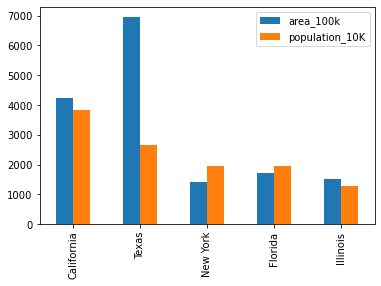

In [45]:
df_city_area_pop.plot(kind='bar') # x='area', y='population', 

In [46]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
df.head()

,A,B,C,D
2000-01-01,0.120696,0.274665,-0.528190,-0.074390
2000-01-02,0.728374,-0.079233,-0.700352,-1.023888
2000-01-03,0.693575,-1.856838,-0.541653,-1.260476
2000-01-04,0.506594,-1.256541,-2.178548,-1.782969
2000-01-05,-0.644466,-1.867150,-1.082364,-1.295214


<AxesSubplot:>

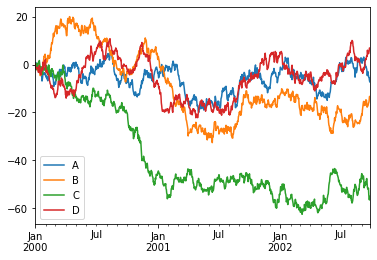

In [47]:
df.plot() # = df.plot(kind='line')

## Getting Data In/Out

### CSV
[Writing to a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv)

In [48]:
df_city_area_pop.head(2)
df_city_area_pop.reset_index().head(2)
df_city_area_pop.reset_index().rename(columns={'index':'state'}).head(2)

,area_100k,population_10K
California,4239,3832
Texas,6956,2644


,index,area_100k,population_10K
0,California,4239,3832
1,Texas,6956,2644


,state,area_100k,population_10K
0,California,4239,3832
1,Texas,6956,2644


In [49]:
df_city_area_pop.reset_index().rename(columns={'index':'state'}).to_csv('df_city_area_pop.csv',index=False)

[Reading from a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table)

In [50]:
df_read_area_pop = pd.read_csv('df_city_area_pop.csv')

In [51]:
df_read_area_pop.head(2)
df_read_area_pop.set_index('state').head(2)

,state,area_100k,population_10K
0,California,4239,3832
1,Texas,6956,2644


,area_100k,population_10K
state,,
California,4239,3832
Texas,6956,2644


### HDF5
Reading and writing to [HDFStores](http://pandas.pydata.org/pandas-docs/stable/io.html#io-hdf5)

Writing to a HDF5 Store

In [52]:
df_city_area_pop.to_hdf('df_city_area_pop.h5','df_city_area_pop')

Reading from a HDF5 Store

In [53]:
pd.read_hdf('df_city_area_pop.h5','df_city_area_pop')

,area_100k,population_10K
California,4239,3832
Texas,6956,2644
New York,1412,1961
Florida,1703,1955
Illinois,1499,1282


### Excel

Reading and writing to [MS Excel](http://pandas.pydata.org/pandas-docs/stable/io.html#io-excel)

Writing to an excel file

In [58]:
df_city_area_pop.reset_index().rename(columns={'index':'state'}).to_excel('df_city_area_pop.xlsx', sheet_name='Sheet1',index=False)

Reading from an excel file

In [62]:
df_excel_read = pd.read_excel('df_city_area_pop.xlsx', 'Sheet1', index_col=None, na_values=['NA'])
df_excel_read.head(3)
df_excel_read.set_index('state').head(3)

,state,area_100k,population_10K
0,California,4239,3832
1,Texas,6956,2644
2,New York,1412,1961


,area_100k,population_10K
state,,
California,4239,3832
Texas,6956,2644
New York,1412,1961
